Note this uses latex as its output printer,
You can download that from here: https://miktex.org/download

Symbols overview: <br>
$w_i$: Weight bias for group $i$. <br>
$n_i$: Number of items in group $i$. <br>
$N$: Total number of items. <br>
$k$: Number of groups.

In [ ]:
from sympy import *
from IPython.display import display

init_printing(use_latex=True)

#initialization of symbols for Sympy library
i = Symbol('i', integer=True)
j = Symbol('j', integer=True)
a = Symbol('a', integer=True)
n_i = Symbol('n_i', integer=True)
n = Symbol('N', integer=True)
k = Symbol('k', integer=True)
r = IndexedBase('r')

X_e = Symbol("X_e") # Expected count in a group
w_i = Symbol('w_i')
s_udh = Symbol('S_UDH')
p_i = Symbol('p_i^{(non\text{-}normalized)}') # Non-normalized Performance Measure
p_i_min = Symbol('p_i^{(min,non-normalized)}') # Minima of Non-normalized Peformance Measure
p_i_max = Symbol('p_i^{(max,non-normalized)}') # Maxima of Non-normalized Performance Measure

P_i = Symbol('P_i') #Normalized Performance Measure

This non-normalized performance measure, $p_i^{(non\text{-}normalized)}$ is given by:


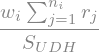

In [12]:
sigma_r_j = Sum(r[j], (j, 1, n_i))
p_i = w_i * sigma_r_j / s_udh
display(p_i)

The Sum of Upper dominant half, $S_{UDH}$ is defined by:

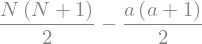

In [13]:
s_udh = n*(n+1)/2 - a*(a+1)/2
display(s_udh)

And the weight bias derivation ($w_i$):

In [14]:
X_e = n/k
fractional_change = (X_e - n_i)/n_i
w_i = 1 + fractional_change
display(simplify(w_i))

If, we assume that total number of items, across all groups, is even i.e N is even.

Then, its safe to assume a = N/2, therefore when N is even, $S_{UDH} = $ 

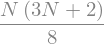

In [15]:
a = n/2
s_udh = n*(n+1)/2 - a*(a+1)/2
display(simplify(s_udh))

For even number of N, $p_i^{(non\text{-}normalized)} = $

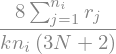

In [16]:
p_i = w_i * sigma_r_j / s_udh
display(simplify(p_i))

The minima, depends on $\frac{\sum r_j}{n_i}$. And, for this to be low $\sum r_j$ should be low. That means $r_j$ have to occupy the lowest ranks such as 1, 2, 3,... so on. We can rewrite $\frac{\sum r_j}{n_i}$ in this format below:

\begin{equation}
	 = \frac{\sum r_j}{n_i} = \frac{\frac{n_i}{2}(1+n_i)}{n_i} = \frac{1}{2} \cdot n_i + \frac{1}{2}
\end{equation}

As this is a linearly increasing line equation with a positive slope ($y = mx + C$), minima of $\frac{\sum r_j}{n_i}$ occurs when $n_i = 1$, as $n_i$ is a natural number and can't be zero or negative, hence, substituting $n_i = 1$, we get, $\frac{\sum r_j}{n_i} = \frac{1}{2} + \frac{1}{2} = 1$, hence  $\frac{\sum r_j}{n_i} = 1 $

Therefore $p_i^{(min, \, non\text{-}normalized)}$ =

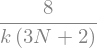

In [17]:
p_i_min = p_i.subs({n_i:1}) # number of elements = 1
p_i_min = p_i_min.doit()
p_i_min = p_i_min.subs({r[1]:1}) # containing one element rank = 1
display(simplify(p_i_min))

Maxima depends on $\frac{\sum r_j}{n_i}$, which needs to be maximized. Therefore, $r_j$ will contain higher ranks, such as N, N-1, N-2,...,k. So, The lowest rank in this arithmetic series can contain is k. Because, there are k groups, that means, each will have at least one element, occupying the lowest ranks, to maximize $\frac{\sum r_j}{n_i}$. That means, first group will contain rank 1, second group will contain rank 2, so on..., and the $k^{th}$ group will have the rest of the elements from rank $k^{th}$ to $N^{th}$ element which we are trying to maximize. Then $\sum r_j$, can be expanded to:
\begin{equation}
	\frac{(N-k+1)(N+k)}{2}
\end{equation}
As, $n_i$ are the number of elements in the group which is equal to $N-k+1$, then simplifying $\frac{\sum r_j}{n_i}$, we get:
\begin{equation}
	\frac{N+k}{2}
\end{equation}

Now to maximize, we can substitute k with N, as k are number of groups, and the max number of groups would be equal to total number of items in the collection, where each group has just one element.
hence maximum value comes out to be:
\begin{equation}
	\frac{\sum r_j}{n_i} = N
\end{equation}

Therefore $p_i^{(max, \, non\text{-}normalized)}$ =

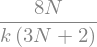

In [18]:
p_i_max = p_i.subs({n_i:1}) # number of elements = 1
p_i_max = p_i_max.doit()
p_i_max = p_i_max.subs({r[1]:n}) # containing one element rank = Nth
display(simplify(p_i_max))


Final formualae for Normalized Performance Measure is given by:
\begin{equation}
	P_i = \frac{p_i^{(non\text{-}normalized)} - p_i^{(min, \, non\text{-}normalized)}}{p_i^{(max, \, non\text{-}normalized)} - p_i^{(min, \, non\text{-}normalized)}}
\end{equation}

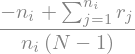

In [19]:
P_i = (p_i - p_i_min)/(p_i_max - p_i_min)
display(factor(simplify(P_i)))

Similarly, when N is odd.

Normalized performance measure formula is same. Because the, Sum of Upper Dominant half ($S_{UDH}$), maxima and minima just differ slightly in nature. But, as these terms occur in the numerator and denominator, they cancel each other out. And, the Normalized Performance Measure remains unchanged. Just, to be complete, we will just list down the equations, which result in the same formula as above.

As, N is odd, where $N^{(min)} = 3$, because there has to be minimum of two groups, therefore, we will take,
\begin{align*}
	a = \frac{N-1}{2}
\end{align*}

Thus, the lower and upper halves would be explicitly:
[1,$\frac{N-1}{2}$] and [$\frac{N+1}{2}$, N]

when N is odd:

'N is odd then,'

'S_UDH = '

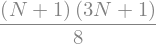

'p_i_normalized = '

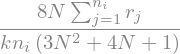

'p_i_minima_non-normalized = '

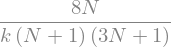

'p_i_maxima_non-normalized = '

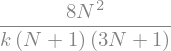

'Normalized Performance Measure, P_i = '

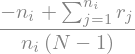

In [20]:
display("N is odd then,")

a = (n - 1)/2
s_udh = n*(n+1)/2 - a*(a+1)/2
display("S_UDH = ",simplify(s_udh))

p_i = w_i * sigma_r_j / s_udh
display("p_i_normalized = ", simplify(p_i))

p_i_min = p_i.subs({n_i:1}) # number of elements = 1
p_i_min = p_i_min.doit()
p_i_min = p_i_min.subs({r[1]:1}) # containing one element rank = 1
display("p_i_minima_non-normalized = ",simplify(p_i_min))

p_i_max = p_i.subs({n_i:1}) # number of elements = 1
p_i_max = p_i_max.doit()
p_i_max = p_i_max.subs({r[1]:n}) # containing one element rank = Nth
display("p_i_maxima_non-normalized = ",simplify(p_i_max))

P_i = (p_i - p_i_min)/(p_i_max - p_i_min)
display("Normalized Performance Measure, P_i = ", factor(simplify(P_i)))